In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
raw_dataset = pd.read_csv('data/TrainingDataset.csv' ,encoding='unicode_escape')

In [6]:
raw_dataset.shape

(11055, 31)

In [7]:
raw_dataset.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
pd.set_option('display.max_rows', 500)
raw_dataset.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [9]:
pd.reset_option('display.max_rows')

In [10]:
original_dataset = raw_dataset.copy()

In [11]:
class_map = {'legitimate':1, 'phishing':-1}
original_dataset['Result'] = original_dataset['Result'].map(class_map)

In [12]:
corr_matrix = original_dataset.corr()

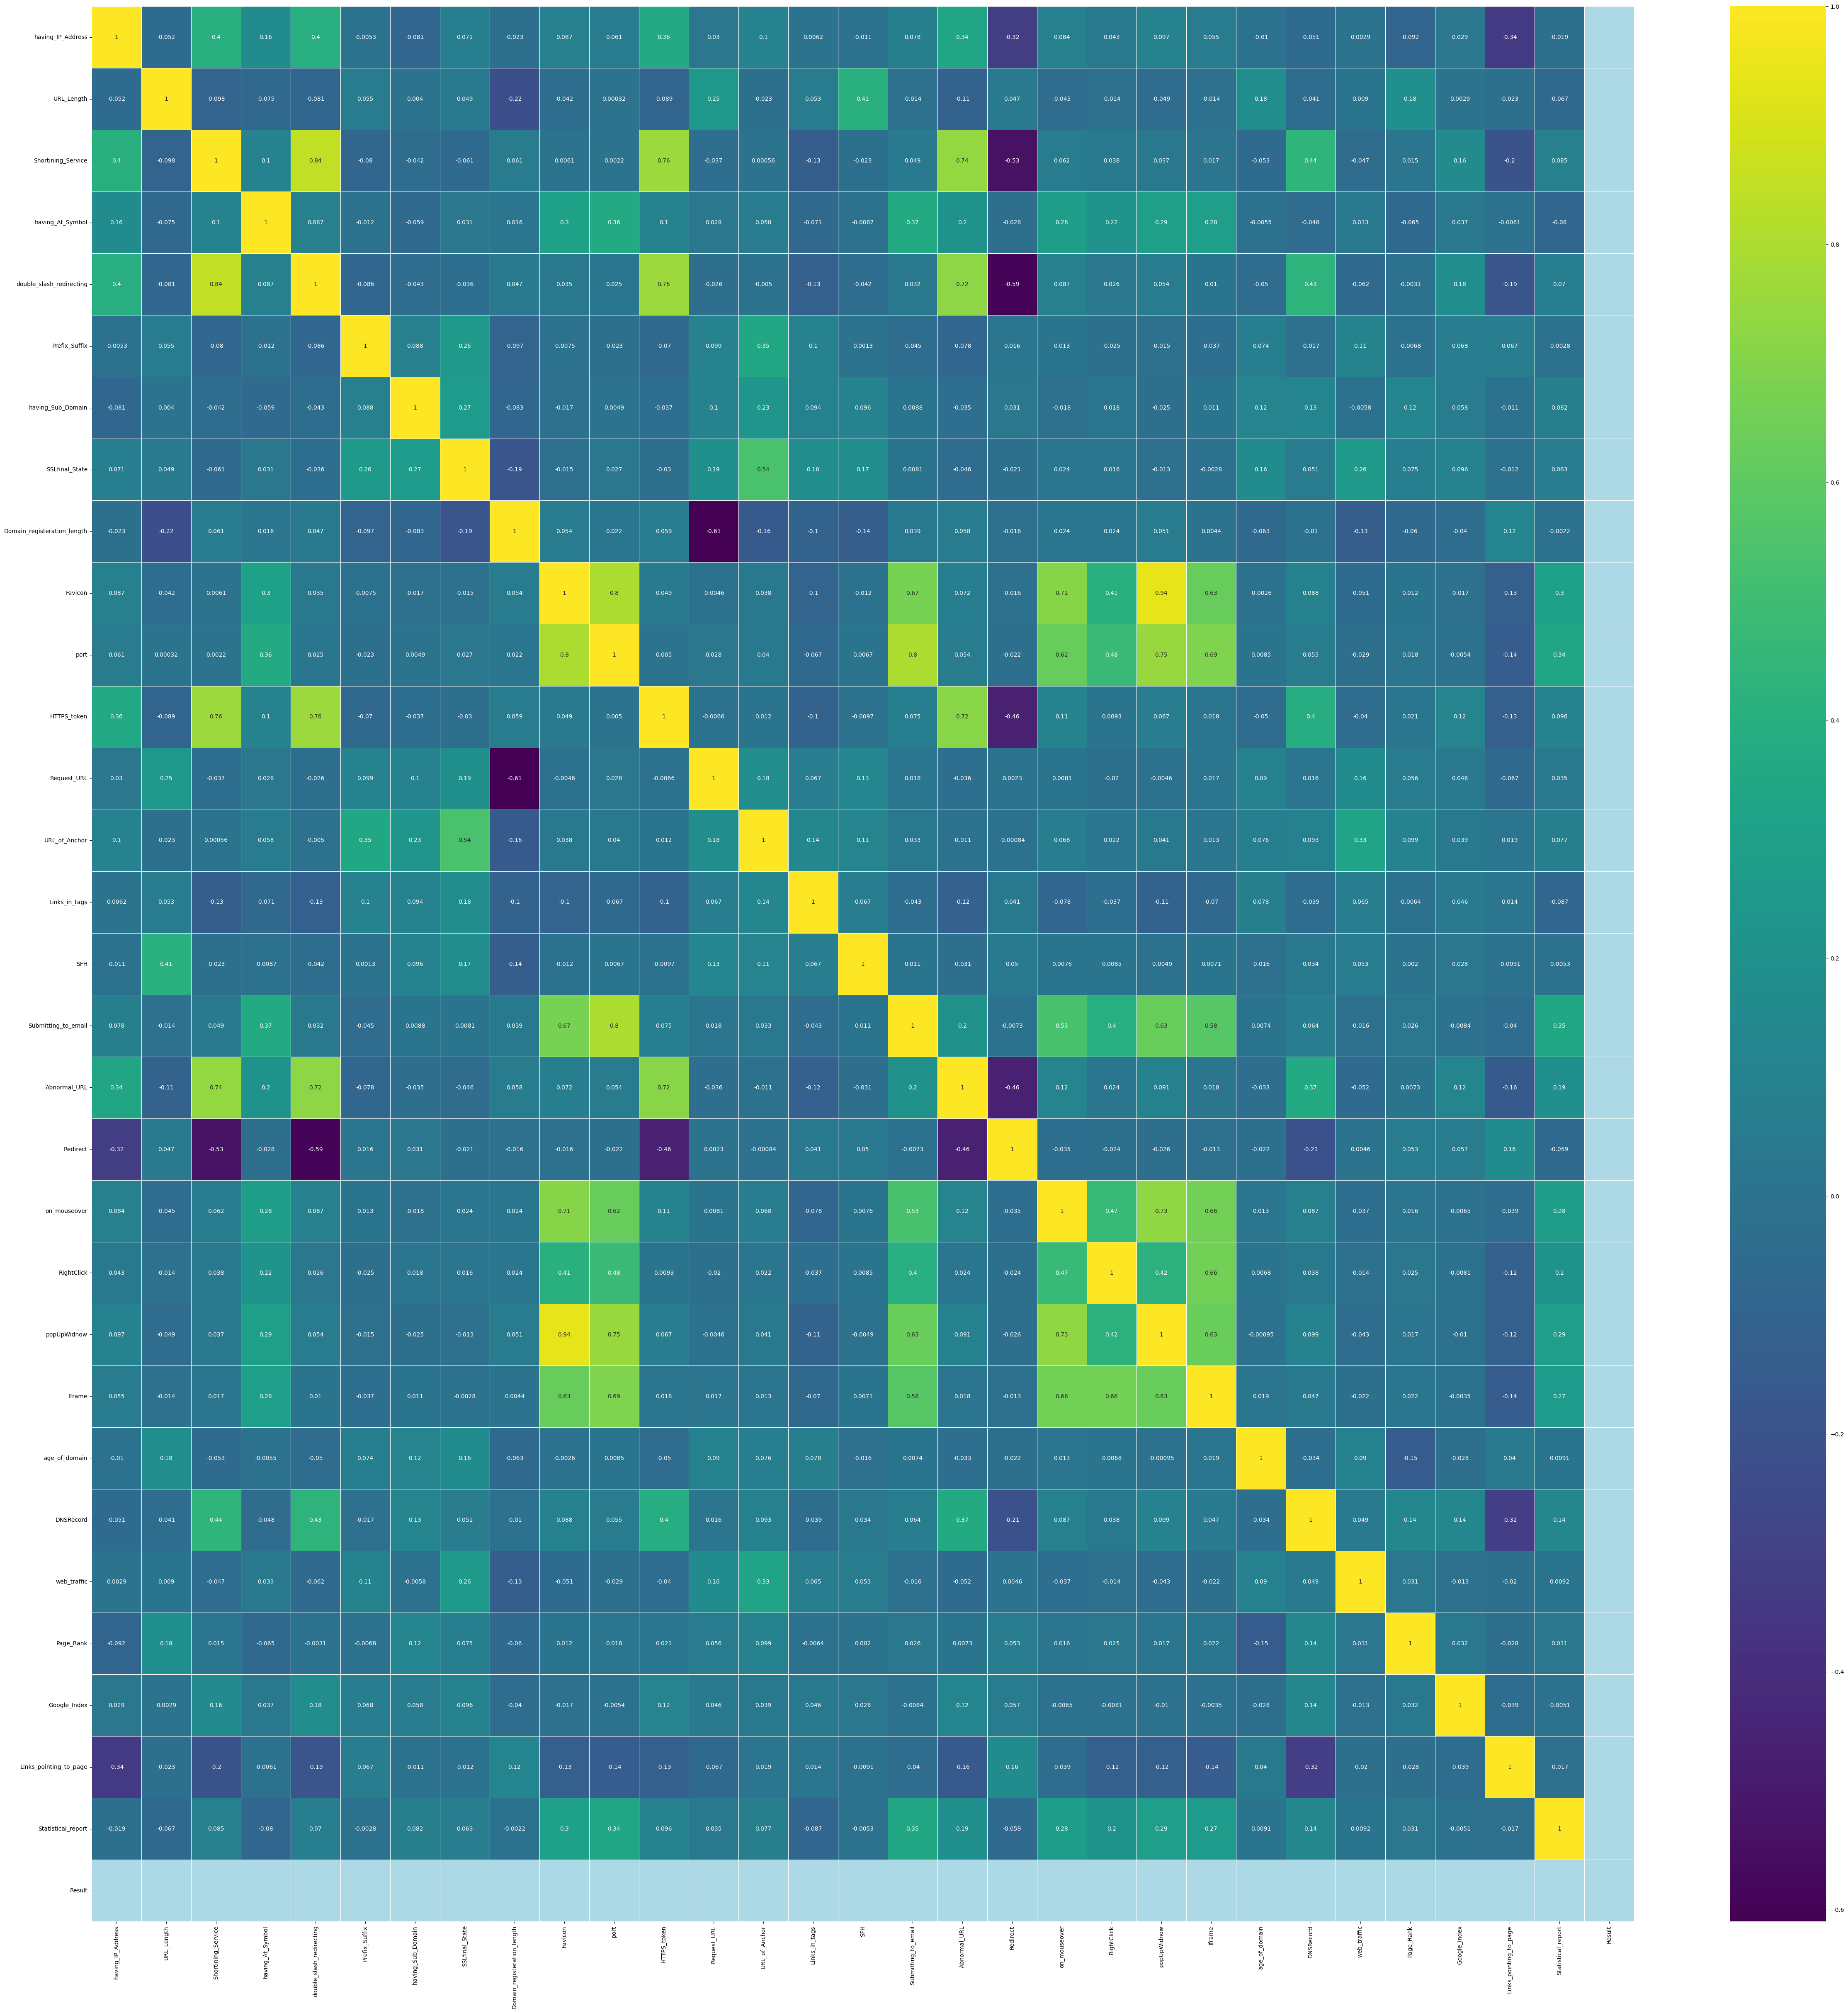

In [13]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy() 
color.set_bad('lightblue')
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [14]:
raw_dataset['Result'].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

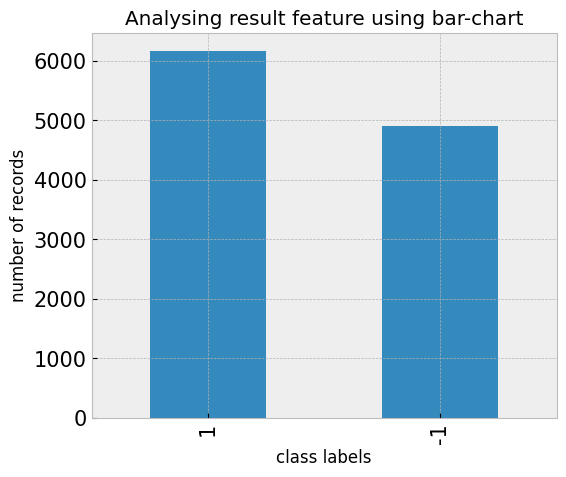

In [15]:
with plt.style.context(style="bmh"):
    fig=raw_dataset['Result'].value_counts().plot.bar(figsize=(6,5),
                                             fontsize=15,
                                             title='bar-chart',
                                            xlabel='class labels',
                                            ylabel='number of records')
    plt.show()

In [16]:
corr_matrix.shape

(31, 31)

In [17]:
corr_matrix['having_IP_Address']

having_IP_Address              1.000000
URL_Length                    -0.052411
Shortining_Service             0.403461
having_At_Symbol               0.158699
double_slash_redirecting       0.397389
Prefix_Suffix                 -0.005257
having_Sub_Domain             -0.080745
SSLfinal_State                 0.071414
Domain_registeration_length   -0.022739
Favicon                        0.087025
port                           0.060979
HTTPS_token                    0.363534
Request_URL                    0.029773
URL_of_Anchor                  0.099847
Links_in_tags                  0.006212
SFH                           -0.010962
Submitting_to_email            0.077989
Abnormal_URL                   0.336549
Redirect                      -0.321181
on_mouseover                   0.084059
RightClick                     0.042881
popUpWidnow                    0.096882
Iframe                         0.054694
age_of_domain                 -0.010446
DNSRecord                     -0.050733


In [18]:
status_corr = corr_matrix['Result']
status_corr.shape

(31,)